In [1]:
# Capstone
import openpyxl
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.manifold import TSNE

referrals = pd.read_excel(r"C:\Users\이희창\Downloads\opd.xlsx", engine='openpyxl')

df = referrals
print(referrals['transplanted'].value_counts())
print(referrals['transplanted'].unique())

# PatientID, HospitalID 및 outcome으로 시작하는 변수들을 원본 데이터프레임(df)에서 제거
outcome_columns = [col for col in df.columns if col.startswith('outcome_')]
columns_to_drop = ['PatientID', 'HospitalID'] + outcome_columns

print("제거할 변수들:", columns_to_drop)

# 원본 데이터프레임에서 선택된 변수들 제거
df = df.drop(columns=columns_to_drop, axis=1)
print(f"변수 제거 후 원본 데이터프레임 크기: {df.shape}")





df_new = df.copy()
def total_values(df,col,list_features,label):
  for i in list_features:
    #print(col,i)
    #Change each column value to the new label based on classification framework
    df[col].mask(df[col]==i, label, inplace=True)





infections=['Sepsis','Septic Shock','Infectious Disease - Bacterial','Infectious Disease - Viral',
            'Infectious Disease - Other, specify','Pneumonia','HIV','Hepatitis','AIDS/HIV']
total_values(df_new,'Cause_of_Death_OPO',infections,'Infectious Disease')

# Cardio
cardio=['CHF','CAR - CHF','AAA or thoracic AA', 'AAA - abdominal aortic aneurysm', 'CAR - cardiomegaly/cardiomyopathy/cardiovascular',
        'Pulmonary embolism','PE--Pulmonary Embolism ','Myocardial infarction',
        'CAR - MI', 'CAR - probable MI', 'CAR - arrhythmia',
        'Arrhythmia','Cardiac - Other, specify']
total_values(df_new,'Cause_of_Death_OPO',cardio,'Circulatory Disease')

# Respiratory
resp=['Anoxia','COPD','RES - COPD', 'Respiratory - Other','Respiratory - Other, specify',
      'RES - other', 'RES - pneumonia', 'RES - lung disease', 'RES - asthma',
      'RES - aspiration']
total_values(df_new,'Cause_of_Death_OPO',resp,'Respiratory Disease')

# Newborn/perinatal
newborn=['Fetal Demise','Prematurity','Sudden infant death syndrome',
         'PED - abuse/shaken baby']
total_values(df_new,'Cause_of_Death_OPO',newborn,'Newborn Disease')

# Cancers
cancers=['Leukemia / Lymphoma','Cancer', 'Cancer - Leukemia/Lymphoma','Cancer/Current or within five years']
total_values(df_new,'Cause_of_Death_OPO',cancers,'Cancer')

# Neurological
neuro=['CVA/Stroke - Cerebro Accident','ICB / ICH', 'Cerebrovascular / Stroke',
       'CNS Tumor','SAH','Meningitis','Seizure/Seizure Disorder', 'Aneurysm',
       ]
total_values(df_new,'Cause_of_Death_OPO',neuro,'Nervous Disease')

# Digestive
digestive=['GI - necrotic bowel','GI - bleed','GI - bowel perforation','GI - bowel obstruction']
total_values(df_new,'Cause_of_Death_OPO',digestive,'Digestive Disease')

# Liver
liver=['Liver Disease/Failure','ESLD']
total_values(df_new,'Cause_of_Death_OPO',liver,'Liver Disease')

# Kidney
kidney=['ESRD','Kidney/Renal  Disease']
total_values(df_new,'Cause_of_Death_OPO',kidney,'Kidney Disease')

# Eye
eye=['PED - other', 'PED - premature']
total_values(df_new,'Cause_of_Death_OPO',eye,'Eye Disease')

# Injuries, mostly external
injury=['GSW','TR - GSW','Drowning','Head Trauma','Trauma','Overdose',
        'Drug Overdose/Probable Drug Abuse','An - other', 'An - asphyixiation',
        'An - smoke inhalation','An -  hanging', 'An - drowning',
        'TR - MVA', 'TR - other', 'TR - other', 'TR - CHI - Closed Head Injury',
        'TR - burns', 'TR - stabbing', 'TR - electrocution','Poisoning',
        'Intracranial Hemorrhage','Exsanguination']
total_values(df_new,'Cause_of_Death_OPO',injury,'Injury_External Causes')

# Multisystem
multi=['Multi-system failure', 'MultiSystem Failure']
total_values(df_new,'Cause_of_Death_OPO',multi,'Multi-system failure')

# Other
other=['Other','Other, specify']
total_values(df_new,'Cause_of_Death_OPO',other,'Other')

#Cluster categories: cause of death UNOS

infections=['Sepsis','Infectious Disease - Bacterial','Infectious Disease - Viral','Infectious Disease - Other, specify','Pneumonia','HIV','Hepatitis']
total_values(df_new,'Cause_of_Death_UNOS',infections,'Infectious Disease')

cardio=['CHF','AAA or thoracic AA', 'Pulmonary embolism','Myocardial infarction','Arrhythmia','Cardiac - Other, specify']
total_values(df_new,'Cause_of_Death_UNOS',cardio,'Circulatory Disease')

resp=['Anoxia','COPD','Respiratory - Other','Respiratory - Other, specify']
total_values(df_new,'Cause_of_Death_UNOS',resp,'Respiratory Disease')

newborn=['Fetal Demise','Prematurity','Sudden infant death syndrome']
total_values(df_new,'Cause_of_Death_UNOS',newborn,'Newborn Disease')

cancers=['Leukemia / Lymphoma','Cancer']
total_values(df_new,'Cause_of_Death_UNOS',cancers,'Cancer')

neuro=['CVA/Stroke','ICB / ICH', 'Cerebrovascular / Stroke', 'CNS Tumor','SAH']
total_values(df_new,'Cause_of_Death_UNOS',neuro,'Nervous Disease')

injury=['GSW','Drowning','Head Trauma','Trauma','Overdose',
        'Exsanguination']
total_values(df_new,'Cause_of_Death_UNOS',injury,'Injury_External Causes')

other=['Other','Other, specify']
total_values(df_new,'Cause_of_Death_UNOS',other,'Other')

# Replace names to keep consistent with OPO category change
df_new['Cause_of_Death_UNOS'].replace('ESRD', 'Kidney Disease', inplace=True)
df_new['Cause_of_Death_UNOS'].replace('ESLD', 'Liver Disease', inplace=True)

# Cluster categories: mechanism of death

# Taking only natural causes
natural_causes=['Natural Causes','Death from Natural Causes']
total_values(df_new,'Mechanism_of_Death',natural_causes,'Natural Causes')

# Taking only injuries and external causes: blunt injury, drug intoxication, gunshot wound, asphyxiation, drowning, stab, electrical
injury_external=['Blunt Injury','Drug Intoxication','Gun Shot Wound','Asphyxiation','Drug / Intoxication',
                 'Drowning','Gunshot Wound','Stab','Electrical']
total_values(df_new,'Mechanism_of_Death',injury_external,'Injury_External Causes')

# Taking only nervous system related disorders: stroke, seizure
nervous_diseases=['ICH/Stroke','Intracranial Hemmorrhage / Stroke','Seizure']
total_values(df_new,'Mechanism_of_Death',nervous_diseases,'Nervous Disease')

# None of the above
nofa=['None of the Above','None of the above']
total_values(df_new,'Mechanism_of_Death',nofa,'Other')

# Cluster categories: Circumstances of Death

# Taking only natural causes
natural_causes=['Natural Causes','Death from Natural Causes']
total_values(df_new,'Circumstances_of_Death',natural_causes,'Natural Causes')

# Taking only motor vehicle accidents
mva=['Motor Vehicle Accident','MVA']
total_values(df_new,'Circumstances_of_Death',mva,'Motor Accident')

# Taking only non-motor vehicle accidents
non_mva=['Non-Motor Vehicle Accident','Accident, Non-MVA']
total_values(df_new,'Circumstances_of_Death',non_mva,'Non-motor Accident')

# Suicide - real or alleged
suicide=['Suicide','Alleged Suicide']
total_values(df_new,'Circumstances_of_Death',suicide,'Suicide')

# Homicide - real or alleged
homicide=['Homicide','Alleged Homicide']
total_values(df_new,'Circumstances_of_Death',homicide,'Homicide')

# Child Abuse - real or alleged
child_abuse=['Child Abuse','Alleged Child Abuse']
total_values(df_new,'Circumstances_of_Death',child_abuse,'Homicide')

# Other/none of the above
other=['Other','None of the Above']
total_values(df_new,'Circumstances_of_Death',other,'Other')



#Feature engineering: dealing with time
def get_duration_between_dates(then, now, interval = "default"):

    """
    Returns a duration as specified by variable interval.
    Used to calculate new feature of time authorized - time approached.

    Code source: https://stackoverflow.com/questions/1345827/how-do-i-find-the-time-difference-between-two-datetime-objects-in-python

    Parameters
    ----------
    then (DateTime): a date-time.
    now (DateTime): another date-time.
    interval (string): type of duration metric, e.g. minutes.

    Returns
    -------
    (float): A float with the duration in interval units.
    """

    duration = now - then # For build-in functions
    duration_in_s = duration.total_seconds()

    def years():
      return divmod(duration_in_s, 31536000) # Seconds in a year=31536000.

    def days(seconds = None):
      return divmod(seconds if seconds != None else duration_in_s, 86400) # Seconds in a day = 86400

    def hours(seconds = None):
      return divmod(seconds if seconds != None else duration_in_s, 3600) # Seconds in an hour = 3600

    def minutes(seconds = None):
      return divmod(seconds if seconds != None else duration_in_s, 60) # Seconds in a minute = 60

    def seconds(seconds = None):
      if seconds != None:
        return divmod(seconds, 1)
      return duration_in_s

    def totalDuration():
        y = years()
        d = days(y[1]) # Use remainder to calculate next variable
        h = hours(d[1])
        m = minutes(h[1])
        s = seconds(m[1])

        return "Time between dates: {} years, {} days, {} hours, {} minutes and {} seconds".format(int(y[0]), int(d[0]), int(h[0]), int(m[0]), int(s[0]))

    return {
        'years': float(years()[0]),
        'days': float(days()[0]),
        'hours': float(hours()[0]),
        'minutes': float(minutes()[0]),
        'seconds': float(seconds()),
        'default': totalDuration()
    }


def create_time_column(df,col1,col2,new_col_name):
  """
  Create new column to describe the number of hours between administrative milestones,
  e.g. between referral (death) and approach.

  Parameters
  ----------
  df (DataFrame): input data.
  col1 (string): name of column representing one timepoint.
  col2 (string): name of column representing another timepoint.
  new_col_name (string): new column name representing a time category between time points.

  Returns
  -------
  df (DataFrame): modified df with new column.

  """
  def convert_datetime(str1,str2):
    # Helper function to convert to datetime
    return [pd.to_datetime(str1), pd.to_datetime(str2)]

  time_category = []
  for row in zip(df[col1], df[col2]):
    if pd.isnull(row[0])==False and pd.isnull(row[1])==False:
      date_row=convert_datetime(row[0],row[1])
      time_elapsed=abs(get_duration_between_dates(date_row[0],date_row[1])['hours'])

      if time_elapsed <= 24:
        time_category.append('Within 24 hours')

      if time_elapsed > 24:
        time_category.append('Over 24 hours')

    else:
      time_category.append('Milestone not reached')

  df[new_col_name]=time_category

  return df


# Define timepoint variables
time_vars = ['time_asystole','time_brain_death','time_referred', 'time_approached', 'time_authorized', 'time_procured']

# Get category of intervals between them
asystole_to_referred = 'time_asystole_to_referred'
df_new = create_time_column(df_new,time_vars[0],time_vars[2], asystole_to_referred)

brain_death_to_referred = 'time_brain_death_to_referred'
df_new = create_time_column(df_new,time_vars[1],time_vars[2], brain_death_to_referred)

referred_to_approached = 'time_referred_to_approached'
df_new = create_time_column(df_new,time_vars[2],time_vars[3], referred_to_approached)

approached_to_authorized = 'time_approached_to_authorized'
df_new = create_time_column(df_new,time_vars[3],time_vars[4], approached_to_authorized)

authorized_to_procured = 'time_authorized_to_procured'
df_new = create_time_column(df_new,time_vars[4],time_vars[5], authorized_to_procured)


def get_missing_data(data):
  missing_data_prop={}
  for x,y in enumerate(list(data.isnull().sum())):
    missing_data_prop[data.columns[x]]=(float(y/data.shape[0])*100) #"{:.2f}".format

  missing_data=pd.DataFrame(missing_data_prop.items(), columns=['column', 'percent_missing'])
  return missing_data

missing_data=get_missing_data(df_new)
missing_data

cols_large_missing=list(missing_data[missing_data['percent_missing']>50]['column'])
print(f'{len(cols_large_missing)} columns to drop due to over 50% missing')
cols_large_missing #over 50% missing



df_new2=df_new.copy()
# Drop time variables and keep (some of) the time interval variables
cols_large_missing.remove('Cause_of_Death_OPO') # Keep this as it is still domain relevant
cols_large_missing.remove('time_brain_death')
cols_large_missing.remove('time_approached')
cols_large_missing.remove('time_authorized')
df_new = df_new.drop(cols_large_missing,axis=1) # drop Procured_Year as it is almost perfectly collinear with Referral_Year (0.98)
   

# Make this copy before we remove collinear variables >0.8
df_new_with_collinear=df_new.copy()
cols_collinear = ['brain_death','time_referred','time_asystole','authorized','procured','time_approached_to_authorized','time_authorized_to_procured']
df_new = df_new.drop(cols_collinear,axis=1)

print(len(df_new.columns))
df_new.columns


import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# 원본 데이터에서 의심 변수 제거
df_clean = df_new.copy()
#df_clean = df_clean.drop(columns=leakage_vars)


# 데이터 유형별로 컬럼 분류하는 함수
def categorize_columns(df):
    """데이터프레임의 컬럼을 유형별로 분류"""
    categorical_cols = []
    numerical_cols = []
    datetime_cols = []
    binary_cols = []
    
    for col in df.columns:
        if col == 'transplanted':
            continue
        
        if pd.api.types.is_datetime64_any_dtype(df[col]):
            datetime_cols.append(col)
        elif pd.api.types.is_numeric_dtype(df[col]):
            if df[col].nunique() <= 2:
                binary_cols.append(col)
            else:
                numerical_cols.append(col)
        elif pd.api.types.is_object_dtype(df[col]) or pd.api.types.is_categorical_dtype(df[col]):
            categorical_cols.append(col)
    
    return categorical_cols, numerical_cols, datetime_cols, binary_cols

# 데이터프레임 복사
df_processed = df_new.copy()

# 불리언 변수를 정수형으로 변환
for col in df_processed.columns:
    if df_processed[col].dtype == 'bool':
        df_processed[col] = df_processed[col].astype(int)

# 시간 관련 변수 처리 (날짜/시간 변수를 수치형으로 변환)
for col in df_processed.columns:
    if pd.api.types.is_datetime64_any_dtype(df_processed[col]):
        # 기준 날짜 선택 (예: 데이터셋의 최소 날짜)
        if not df_processed[col].isna().all():  # 모든 값이 NaN이 아닌 경우만
            reference_date = df_processed[col].min()
            # 날짜를 일수로 변환
            df_processed[col] = (df_processed[col] - reference_date).dt.total_seconds() / (24 * 3600)
            # NaN 값을 0으로 대체
            df_processed[col] = df_processed[col].fillna(0)

transplanted
False    124129
True       8972
Name: count, dtype: int64
[False  True]
제거할 변수들: ['PatientID', 'HospitalID', 'outcome_heart', 'outcome_liver', 'outcome_kidney_left', 'outcome_kidney_right', 'outcome_lung_left', 'outcome_lung_right', 'outcome_intestine', 'outcome_pancreas']
변수 제거 후 원본 데이터프레임 크기: (133101, 24)


C:\Users\이희창\AppData\Local\Temp\ipykernel_15704\2302894659.py:37: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].mask(df[col]==i, label, inplace=True)
C:\Users\이희창\AppData\Local\Temp\ipykernel_15704\2302894659.py:37: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example,

6 columns to drop due to over 50% missing
20


In [2]:


# 목표 변수 분리
X_df = df_processed.drop('transplanted', axis=1)
y = df_processed['transplanted']

# 변수 유형 분류
categorical_cols, numerical_cols, datetime_cols, binary_cols = categorize_columns(df_processed)

print(X_df.columns)
print(f"범주형 변수: {len(categorical_cols)}개")
print(f"수치형 변수: {len(numerical_cols)}개")
print(f"날짜/시간 변수(수치형으로 변환됨): {len(datetime_cols)}개")
print(f"이진 변수: {len(binary_cols)}개")

# 날짜/시간 변수는 이미 수치형으로 변환되었으므로 수치형 변수에 추가
numerical_cols.extend(datetime_cols)

# 결측치 처리 및 정규화를 위한 전처리 파이프라인 생성
transformers = []

if numerical_cols:
    transformers.append(('num', Pipeline([
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())
    ]), numerical_cols))

if categorical_cols:
    transformers.append(('cat', Pipeline([
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('onehot', OneHotEncoder(handle_unknown='ignore'))
    ]), categorical_cols))

if binary_cols:
    transformers.append(('bin', Pipeline([
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('scaler', StandardScaler())
    ]), binary_cols))

# 모든 변수가 맞게 분류되었는지 확인
all_cols = categorical_cols + numerical_cols + binary_cols
missing_cols = [col for col in X_df.columns if col not in all_cols]
if missing_cols:
    print(f"분류되지 않은 컬럼: {missing_cols}")
    print("이 컬럼들은 그대로 유지됩니다.")

preprocessor = ColumnTransformer(
    transformers=transformers,
    remainder='passthrough'  # 분류되지 않은 열도 유지
)

# 전처리 적용
print("전처리 파이프라인 적용 중...")
X_preprocessed = preprocessor.fit_transform(X_df)

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(
    X_preprocessed, y, test_size=0.3, random_state=42
)

# 훈련 및 검증 세트 분할
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42
)

print(f"전처리 완료!")
print(f"X_train shape: {X_train.shape}")
print(f"X_val shape: {X_val.shape}")
print(f"X_test shape: {X_test.shape}")

# ---- 데이터 준비, 클래스 가중치 계산 ----
pos_samples = np.sum(y_train)
neg_samples = len(y_train) - pos_samples
total_samples = len(y_train)
weight_for_0 = (1 / neg_samples) * (total_samples / 2.0)
weight_for_1 = (1 / pos_samples) * (total_samples / 2.0)
class_weight = {0: weight_for_0, 1: weight_for_1}

print(f"\n클래스 분포:")
print(f"True (이식됨) 샘플 수: {pos_samples} ({pos_samples/total_samples*100:.2f}%)")
print(f"False (이식되지 않음) 샘플 수: {neg_samples} ({neg_samples/total_samples*100:.2f}%)")
print(f"\n클래스 가중치:")
print(f"클래스 0(이식되지 않음)의 가중치: {weight_for_0:.4f}")
print(f"클래스 1(이식됨)의 가중치: {weight_for_1:.4f}")

import numpy as np

# sparse matrix를 dense로 변환 후 계산
X_train_dense = X_train.toarray()
X_test_dense = X_test.toarray()

print(f"\nX_train 최대값: {X_train.max()}")
print(f"X_train 최소값: {X_train.min()}")
print(f"X_train 표준편차: {np.std(X_train_dense)}")
print(f"X_train 분산: {np.var(X_train_dense)}")
print(f"X_train 평균: {np.mean(X_train_dense)}")

print(f"\nX_test 최대값: {X_test.max()}")
print(f"X_test 최소값: {X_test.min()}")
print(f"X_test 표준편차: {np.std(X_test_dense)}")
print(f"X_test 분산: {np.var(X_test_dense)}")
print(f"X_test 평균: {np.mean(X_test_dense)}")



Index(['OPO', 'Age', 'Gender', 'Race', 'Cause_of_Death_OPO',
       'Cause_of_Death_UNOS', 'Mechanism_of_Death', 'Circumstances_of_Death',
       'approached', 'Tissue_Referral', 'Eye_Referral', 'time_brain_death',
       'time_approached', 'time_authorized', 'Referral_DayofWeek',
       'Referral_Year', 'time_asystole_to_referred',
       'time_brain_death_to_referred', 'time_referred_to_approached'],
      dtype='object')
범주형 변수: 11개
수치형 변수: 5개
날짜/시간 변수(수치형으로 변환됨): 0개
이진 변수: 3개
전처리 파이프라인 적용 중...
전처리 완료!
X_train shape: (74536, 74)
X_val shape: (18634, 74)
X_test shape: (39931, 74)

클래스 분포:
True (이식됨) 샘플 수: 5005 (6.71%)
False (이식되지 않음) 샘플 수: 69531 (93.29%)

클래스 가중치:
클래스 0(이식되지 않음)의 가중치: 0.5360
클래스 1(이식됨)의 가중치: 7.4462

X_train 최대값: 5.124093874121974
X_train 최소값: -3.14850442394008
X_train 표준편차: 0.48475041042901174
X_train 분산: 0.23498296041109532
X_train 평균: 0.14853246069648365

X_test 최대값: 5.060831048762943
X_test 최소값: -3.14850442394008
X_test 표준편차: 0.48430494136447566
X_test 분산: 0.23455

개선된 MAE 모델 학습

MAE 모델 학습 시작...
입력 차원: 74
마스크 비율: 0.2
Epoch 1/50
1165/1165 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0958 - mae: 0.1780 - val_loss: 0.0418 - val_mae: 0.1187
Epoch 2/50
1165/1165 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0509 - mae: 0.1221 - val_loss: 0.0335 - val_mae: 0.1053
Epoch 3/50
1165/1165 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0430 - mae: 0.1092 - val_loss: 0.0276 - val_mae: 0.0941
Epoch 4/50
1165/1165 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0379 - mae: 0.1001 - val_loss: 0.0216 - val_mae: 0.0832
Epoch 5/50
1165/1165 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0342 - mae: 0.0922 - val_loss: 0.0169 - val_mae: 0.0726
Epoch 6/50
1165/1165 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0315 - mae: 0.0851 - val_loss: 0.0140 - val_mae: 0.0661
Epoch 7/50
1165/1165 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0296 - mae: 0.0798 - val_loss: 0.0163 - val_mae: 0.0684
Epoch 8/50
1165/1165 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0280 - mae: 0.0756 - val_loss: 0.0122 - val

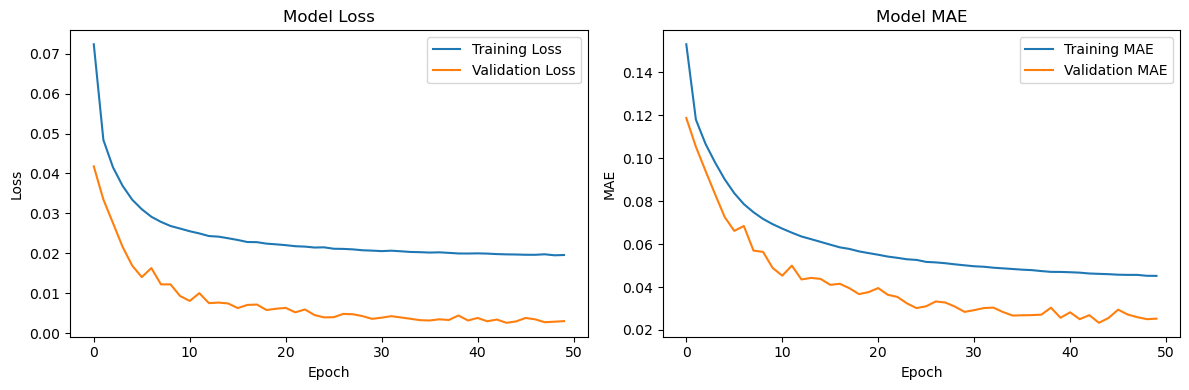


✅ MAE 인코더가 성공적으로 학습되었습니다!
인코더 출력 차원: (None, 64)


In [3]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import RMSprop

class MaskingLayer(layers.Layer):
    def __init__(self, mask_ratio=0.5, **kwargs):
        super(MaskingLayer, self).__init__(**kwargs)
        self.mask_ratio = mask_ratio
        
    def call(self, inputs, training=None):
        if training:
            # 학습 시에만 마스킹 적용
            mask = tf.random.uniform(shape=tf.shape(inputs)) > self.mask_ratio
            masked_inputs = tf.where(mask, inputs, tf.zeros_like(inputs))
            return masked_inputs
        else:
            # 평가 시에는 마스킹하지 않음
            return inputs

def build_encoder(input_shape):
    inputs = layers.Input(shape=input_shape)
    x = layers.Dense(256, activation='relu')(inputs)
    x = layers.Dense(128, activation='relu')(x)
    x = layers.Dense(64, activation='relu')(x)
    latent = layers.Dense(64, activation='relu')(x)
    return models.Model(inputs, latent, name='encoder')
    
def build_decoder(latent_shape, output_dim):
    inputs = layers.Input(shape=latent_shape)
    x = layers.Dense(64, activation='relu')(inputs)
    x = layers.Dense(128, activation='relu')(x)
    x = layers.Dense(256, activation='relu')(x)
    outputs = layers.Dense(output_dim, activation=None)(x)
    return models.Model(inputs, outputs, name='decoder')

def build_mae_model(input_shape, mask_ratio=0.2):
    """개선된 MAE 모델 구축"""
    
    # 입력 차원
    input_dim = input_shape[0] if isinstance(input_shape, tuple) else input_shape
    
    # 모델 구성
    inputs = layers.Input(shape=(input_dim,))
    
    # 마스킹 (학습 시에만)
    masked_inputs = MaskingLayer(mask_ratio=mask_ratio)(inputs)
    
    # 인코더-디코더
    encoder = build_encoder((input_dim,))
    decoder = build_decoder((64,), input_dim)
    
    latent = encoder(masked_inputs)
    reconstructed = decoder(latent)
    
    # 전체 모델
    autoencoder = models.Model(inputs, reconstructed, name='mae_autoencoder')
    
    return autoencoder, encoder, decoder

def train_mae_model(X_train, X_val, mask_ratio=0.5, epochs=50, batch_size=64):
    """MAE 모델 학습"""
    
    # 데이터 전처리
    if hasattr(X_train, 'toarray'):
        X_train = X_train.toarray()
    if hasattr(X_val, 'toarray'):
        X_val = X_val.toarray()
    
    input_shape = X_train.shape[1]
    
    # 모델 구축
    autoencoder, encoder, decoder = build_mae_model(input_shape, mask_ratio)
    
    # 컴파일 (MSE 손실 사용 - MAE의 표준)
    autoencoder.compile(
        optimizer=RMSprop(learning_rate=0.001), 
        loss='mse',  # 표준 MSE 사용
        metrics=['mae']
    )
    
    # 조기 종료
    early_stopping = EarlyStopping(
        monitor='val_loss',
        patience=15,
        restore_best_weights=True,
        verbose=1
    )
    
    print("MAE 모델 학습 시작...")
    print(f"입력 차원: {input_shape}")
    print(f"마스크 비율: {mask_ratio}")
    
    # 학습
    history = autoencoder.fit(
        X_train, X_train,
        validation_data=(X_val, X_val),
        epochs=epochs,
        batch_size=batch_size,
        callbacks=[early_stopping],
        verbose=1
    )
    
    print(f"최종 학습 손실: {history.history['loss'][-1]:.4f}")
    print(f"최종 검증 손실: {history.history['val_loss'][-1]:.4f}")
    
    return autoencoder, encoder, decoder, history

# 사용 예시
print("="*50)
print("개선된 MAE 모델 학습")
print("="*50)

autoencoder, mae_encoder, decoder, history = train_mae_model(
    X_train, X_val, 
    mask_ratio=0.5, 
    epochs=50, 
    batch_size=64
)

# 학습 결과 시각화 (선택사항)
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Model MAE')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()

plt.tight_layout()
plt.show()

print("\n✅ MAE 인코더가 성공적으로 학습되었습니다!")
print(f"인코더 출력 차원: {mae_encoder.output_shape}")

In [4]:

import time
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

def to_dense(data):
    """sparse matrix를 dense matrix로 변환"""
    if hasattr(data, 'toarray'):
        return data.toarray()
    return data

def train_ann_model(X_train, y_train, X_val, y_val, X_test, y_test, 
                   encoder=None, model_name='ANN', class_weight=None):
    """ANN 모델 학습 및 평가"""
    print(f"\n{model_name} 모델 학습 시작...")
    start_time = time.time()
    
    # 데이터 준비
    X_train_dense = to_dense(X_train)
    X_val_dense = to_dense(X_val)
    X_test_dense = to_dense(X_test)
    
    # MAE encoder 사용 여부에 따른 모델 구성
    if encoder is not None:
        # 1. 먼저 MAE encoder로 인코딩된 특성 생성
        X_train_encoded = encoder.predict(X_train_dense)
        X_val_encoded = encoder.predict(X_val_dense)
        X_test_encoded = encoder.predict(X_test_dense)
        
        # 2. 원본 데이터와 인코딩된 데이터를 연결
        X_train_combined = tf.concat([X_train_dense, X_train_encoded], axis=-1)
        X_val_combined = tf.concat([X_val_dense, X_val_encoded], axis=-1)
        X_test_combined = tf.concat([X_test_dense, X_test_encoded], axis=-1)
        
        input_dim = X_train_combined.shape[1]
        
        # ANN 모델 구성
        model = Sequential([
            Input(shape=(input_dim,)),
            Dense(64, activation='relu'),
            Dropout(0.15),
            Dense(32, activation='relu'),
            Dropout(0.07),
            Dense(16, activation='relu'),
            Dense(1, activation='sigmoid')
        ])
        
        train_data, val_data, test_data = X_train_combined, X_val_combined, X_test_combined
        
    else:
        # 기본 ANN 모델
        input_dim = X_train_dense.shape[1]
        model = Sequential([
            Input(shape=(input_dim,)),
            Dense(64, activation='relu'),
            Dropout(0.15),
            Dense(32, activation='relu'),
            Dropout(0.07),
            Dense(16, activation='relu'),
            Dense(1, activation='sigmoid')
        ])
        
        train_data, val_data, test_data = X_train_dense, X_val_dense, X_test_dense
    
    # 모델 컴파일
    model.compile(optimizer=Adam(learning_rate=0.0007), 
                 loss='binary_crossentropy', 
                 metrics=['accuracy'])
    
    # 조기 종료 설정
    early_stopping = EarlyStopping(monitor='val_loss', patience=12, 
                                  restore_best_weights=True, verbose=1)
    
    # 모델 학습
    history = model.fit(
        train_data, y_train,
        validation_data=(val_data, y_val),
        epochs=120,
        batch_size=64,
        callbacks=[early_stopping],
        verbose=1,
        class_weight=class_weight
    )
    
    # 예측 및 평가
    y_test_prob = model.predict(test_data).flatten()
    y_test_pred = (y_test_prob >= 0.5).astype(int)
    
    # 성능 지표 계산
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_precision = precision_score(y_test, y_test_pred)
    test_recall = recall_score(y_test, y_test_pred)  # 민감도(sensitivity)
    test_f1 = f1_score(y_test, y_test_pred)
    test_auc = roc_auc_score(y_test, y_test_prob)
    
    execution_time = time.time() - start_time
    
    return {
        'accuracy': test_accuracy,
        'precision': test_precision,
        'recall': test_recall,  # 민감도
        'f1': test_f1,
        'auc': test_auc,
        'execution_time': execution_time
    }

# 1. 기본 ANN 모델 학습
print("="*50)
print("기본 ANN 모델 vs MAE+ANN 모델 성능 비교")
print("="*50)

ann_results = train_ann_model(X_train, y_train, X_val, y_val, X_test, y_test, 
                             encoder=None, model_name='기본 ANN', class_weight=class_weight)

# 2. MAE encoder + ANN 모델 학습
mae_ann_results = train_ann_model(X_train, y_train, X_val, y_val, X_test, y_test, 
                                 encoder=mae_encoder, model_name='MAE+ANN', class_weight=class_weight)

# 3. 결과 비교
print("\n" + "="*60)
print("최종 성능 비교 결과")
print("="*60)
print(f"{'지표':<15} {'기본 ANN':<12} {'MAE+ANN':<12} {'개선도':<10}")
print("-" * 60)
print(f"{'정확도':<15} {ann_results['accuracy']:<12.4f} {mae_ann_results['accuracy']:<12.4f} {(mae_ann_results['accuracy']-ann_results['accuracy'])*100:>+7.2f}%")
print(f"{'정밀도':<15} {ann_results['precision']:<12.4f} {mae_ann_results['precision']:<12.4f} {(mae_ann_results['precision']-ann_results['precision'])*100:>+7.2f}%")
print(f"{'민감도(재현율)':<15} {ann_results['recall']:<12.4f} {mae_ann_results['recall']:<12.4f} {(mae_ann_results['recall']-ann_results['recall'])*100:>+7.2f}%")
print(f"{'F1 점수':<15} {ann_results['f1']:<12.4f} {mae_ann_results['f1']:<12.4f} {(mae_ann_results['f1']-ann_results['f1'])*100:>+7.2f}%")
print(f"{'AUC':<15} {ann_results['auc']:<12.4f} {mae_ann_results['auc']:<12.4f} {(mae_ann_results['auc']-ann_results['auc'])*100:>+7.2f}%")
print(f"{'학습시간(초)':<15} {ann_results['execution_time']:<12.2f} {mae_ann_results['execution_time']:<12.2f} {(mae_ann_results['execution_time']-ann_results['execution_time']):>+7.2f}초")

print(f"\n핵심 개선 사항:")
print(f"• F1 점수 개선: {ann_results['f1']:.4f} → {mae_ann_results['f1']:.4f} ({(mae_ann_results['f1']-ann_results['f1'])*100:+.2f}%)")
print(f"• 민감도 개선: {ann_results['recall']:.4f} → {mae_ann_results['recall']:.4f} ({(mae_ann_results['recall']-ann_results['recall'])*100:+.2f}%)")

기본 ANN 모델 vs MAE+ANN 모델 성능 비교

기본 ANN 모델 학습 시작...
Epoch 1/120
1165/1165 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9329 - loss: 0.1637 - val_accuracy: 0.9625 - val_loss: 0.1083
Epoch 2/120
1165/1165 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9643 - loss: 0.0746 - val_accuracy: 0.9668 - val_loss: 0.0932
Epoch 3/120
1165/1165 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9657 - loss: 0.0719 - val_accuracy: 0.9643 - val_loss: 0.1061
Epoch 4/120
1165/1165 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9653 - loss: 0.0701 - val_accuracy: 0.9686 - val_loss: 0.0857
Epoch 5/120
1165/1165 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9688 - loss: 0.0656 - val_accuracy: 0.9684 - val_loss: 0.0933
Epoch 6/120
1165/1165 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9696 - loss: 0.0644 - val_accuracy: 0.9702 - val_loss: 0.0822
Epoch 7/120
1165/1165 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9716 - loss: 0.0607 - val_accuracy: 0.9715 - val_loss: 0.0836
Epoch 8/120
1165/1165 ━━━━━━━━━━━